In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 as cv

In [ ]:
!wget http://javphe.net/wp-content/uploads/2020/05/t28-464.jpg -O himekawa.jpg

--2020-09-24 15:31:39--  http://javphe.net/wp-content/uploads/2020/05/t28-464.jpg
Resolving javphe.net (javphe.net)... 104.31.5.166, 104.31.4.166, 2606:4700:3038::681f:4a6, ...
Connecting to javphe.net (javphe.net)|104.31.5.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34116 (33K) [image/jpeg]
Saving to: ‘himekawa.jpg’

himekawa.jpg        100%[===================>]  33.32K  --.-KB/s    in 0.009s  

2020-09-24 15:31:39 (3.79 MB/s) - ‘himekawa.jpg’ saved [34116/34116]



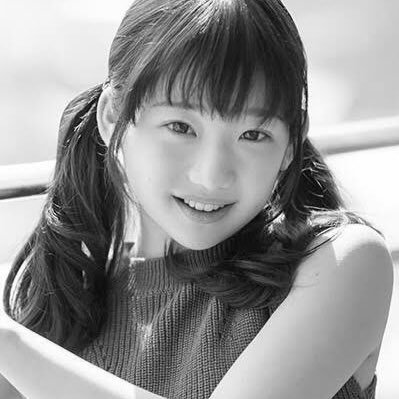

[[247 247 247 ... 204 204 204]
 [247 247 247 ... 204 204 204]
 [247 247 247 ... 204 204 204]
 ...
 [149 148 147 ... 237 237 237]
 [147 147 146 ... 237 237 237]
 [145 145 145 ... 237 237 237]]


In [ ]:
im = cv.imread('/content/himekawa.jpg',0)
cv2_imshow(im)
im = np.array(im)
print(im)

In [ ]:
in_img = np.array([[1, 0, 0, 1, 0],
                   [0, 1, 1, 0, 1],
                   [1, 0, 1, 0, 1],
                   [1, 0, 0, 1, 1],
                   [0, 1, 1, 0, 1]
                   ])

kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
kernel180 = [] #phép tích chập (convolution) với khác biệt là kernel được xoay 180 độ
for item in kernel[::-1]:
  kernel180.append(item[::-1])
kernel180 = np.array(kernel180)
print(kernel180)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [ ]:
def correlation(img, kernel):
    img_height = img.shape[0]
    img_width = img.shape[1]

    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    H = (kernel_height - 1) // 2
    W = (kernel_width - 1) // 2

    out = np.zeros((img_height, img_width))

    for i in np.arange(H, img_height - H):
        for j in np.arange(W, img_width - W):
            sum = 0
            for k in np.arange(-H, H + 1):
                for l in np.arange(-W, W + 1):
                    a = img[i + k, j + l]
                    w = kernel[H + k, W + l]
                    sum += (w * a)
            out[i, j] = sum
    return out

#correlation

In [ ]:
out_img = correlation(in_img, kernel)
with np.printoptions(suppress=True):
    print(out_img)

[[0. 0. 0. 0. 0.]
 [0. 5. 1. 3. 0.]
 [0. 2. 3. 3. 0.]
 [0. 2. 2. 5. 0.]
 [0. 0. 0. 0. 0.]]


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0. -5. -8. ...  0.  0.  0.]
 [ 0. -3. -6. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


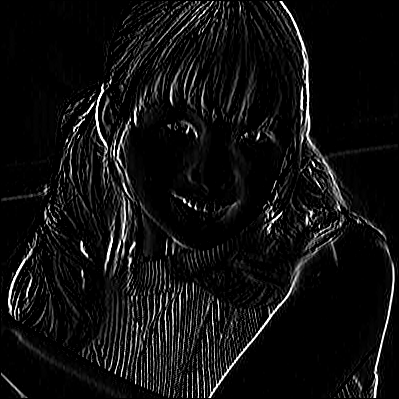

In [ ]:
out_img = correlation(im, kernel)
with np.printoptions(suppress=True):
    print(out_img)
cv2_imshow(out_img)

#convolution

In [ ]:
out_img = correlation(in_img, kernel180)
with np.printoptions(suppress=True):
    print(out_img)

[[0. 0. 0. 0. 0.]
 [0. 3. 3. 2. 0.]
 [0. 2. 3. 4. 0.]
 [0. 4. 0. 4. 0.]
 [0. 0. 0. 0. 0.]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 5. 8. ... 0. 0. 0.]
 [0. 3. 6. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


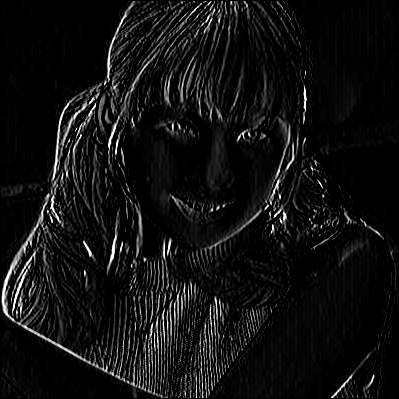

In [ ]:
out_img = correlation(im, kernel180)
with np.printoptions(suppress=True):
    print(out_img)
cv2_imshow(out_img)